In [ ]:
import sqlite3
import pandas as pd
#create in memo
conn = sqlite3.connect(':memory')
df = pd.read_csv('/content/cleaned_sales_dataset.csv')
df.to_sql('sales', conn, index=False, if_exists= 'replace')

300

In [ ]:
#Which product categories generate the highest total revenue
#This query identifies the top-performing product categories based on total
#revenue, helping business focus on high-vakue products
sql_query = '''
SELECT Product_Category,
    SUM(Total_Amount_Clean) AS Total_Revenue
FROM sales
GROUP BY Product_Category
ORDER BY Total_Revenue DESC;
'''
result_df = pd.read_sql_query(sql_query, conn)
print(result_df)

  Product_Category  Total_Revenue
0            Books      164857.53
1      Accessories      124611.38
2         Clothing      123410.98
3       Home Decor      117015.39
4      Electronics       96294.02


In [ ]:
#What is the business sales trend?
#Monthly revenue trends help identify sesonal patterns and support
#forecasting and inventory planning
sql_query= '''
SELECT strftime('%Y-%m', Invoice_Date_Clean) AS Month,
SUM(Total_Amount_Clean) AS Monthly_Revenue
FROM sales
GROUP BY Month
ORDER BY Month;
'''
result_df= pd.read_sql_query(sql_query, conn)
print(result_df)

      Month  Monthly_Revenue
0   2024-01         33441.39
1   2024-02         56177.67
2   2024-03         13029.86
3   2024-04         58803.18
4   2024-05         82397.80
5   2024-06         47475.07
6   2024-07         45636.23
7   2024-08         70399.28
8   2024-09         63876.70
9   2024-10         60846.72
10  2024-11         44628.87
11  2024-12         49476.53


In [ ]:
#Which countries contribute the most to revenue
#This query highlights the strongest geographic markets, guiding regional
#business strategies
sql_query='''
SELECT Country_Clean,
SUM(Total_Amount_Clean) AS Total_Revenue
FROM sales
GROUP BY Country_Clean
ORDER BY Total_Revenue DESC;
'''
result_df = pd.read_sql_query(sql_query, conn)
print(result_df)

  Country_Clean  Total_Revenue
0            UK      231703.81
1         india      215755.12
2           USA      178730.37


In [ ]:
#What is the most preferred payment method?
#Understanding payment preferences allows businesses to streamline
#payment options and improve customer experience.
sql_query='''
SELECT
    Payment_Mode_Clean,
    COUNT(*) AS Number_of_Transactions
FROM sales
GROUP BY Payment_Mode_Clean
ORDER BY Number_of_Transactions DESC;
'''
result_df = pd.read_sql_query(sql_query, conn)
print(result_df)

  Payment_Mode_Clean  Number_of_Transactions
0                UPI                     103
1               Cash                     101
2               Card                      96


In [ ]:
#What is the average order valueby product category?
sql_query = '''
SELECT
    Product_Category,
    AVG(Total_Amount_Clean) AS Average_Order_Value
FROM sales
GROUP BY Product_Category
ORDER BY Average_Order_Value DESC;
'''

result_df = pd.read_sql_query(sql_query, conn)
print(result_df)

  Product_Category  Average_Order_Value
0       Home Decor          2294.419412
1            Books          2198.100400
2      Accessories          2042.809508
3         Clothing          1990.499677
4      Electronics          1888.118039


In [ ]:
#How does revenue vary across customer age groups?
sql_query = '''
SELECT
  CASE
    WHEN Customer_Age <25 THEN 'Below 25'
    WHEN Customer_Age BETWEEN 25 AND 34 THEN '25-34'
    WHEN Customer_Age BETWEEN 35 AND 44 THEN '35-44'
    WHEN Customer_Age BETWEEN 45 AND 54 THEN '45-54'
    ELSE '55+'
  END AS Age_Group,
  SUM(Total_Amount_Clean) AS Total_Revenue
FROM sales
GROUP BY Age_Group
ORDER BY Total_Revenue DESC;
'''
result_df = pd.read_sql_query(sql_query, conn)
print(result_df)

  Age_Group  Total_Revenue
0     45-54      258425.40
1     25-34      183942.44
2     35-44      183821.46


In [ ]:
numeric_df = df[['Customer_Age', 'Quantity','Unit_Price','Total_Amount_Clean']]
numeric_df.head()

,Customer_Age,Quantity,Unit_Price,Total_Amount_Clean
0,40,3,1101.52,3304.56
1,38,2,518.37,1036.74
2,32,1,1495.76,1495.76
3,34,2,1470.68,2941.36
4,36,5,1001.39,5006.95


In [ ]:
numeric_df.corr()

,Customer_Age,Quantity,Unit_Price,Total_Amount_Clean
Customer_Age,1.000000,0.079572,-0.070982,0.021160
Quantity,0.079572,1.000000,0.003376,0.693648
Unit_Price,-0.070982,0.003376,1.000000,0.611864
Total_Amount_Clean,0.021160,0.693648,0.611864,1.000000


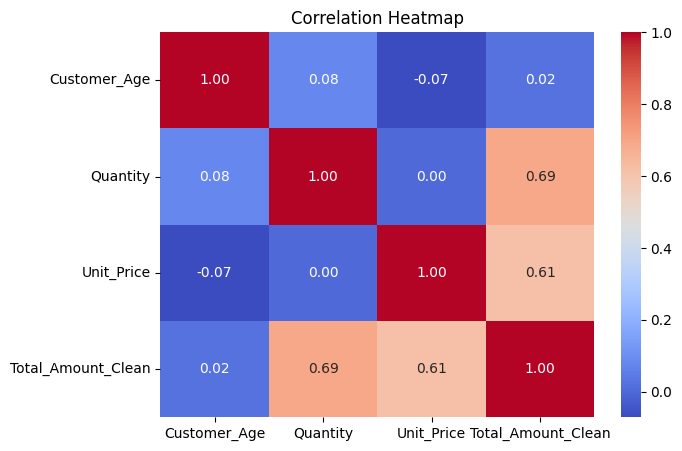

In [ ]:
#The heatmap indicates a strong positive
#correlation between Quantity and Total Amount,
# confirming that higher quantities directly increase revenue.
# Other variables show weaker relationships,
#suggesting limited direct dependency.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(
    numeric_df.corr(),
    annot= True,
    cmap = 'coolwarm',
    fmt = ".2f"
)

plt.title("Correlation Heatmap")
plt.show()

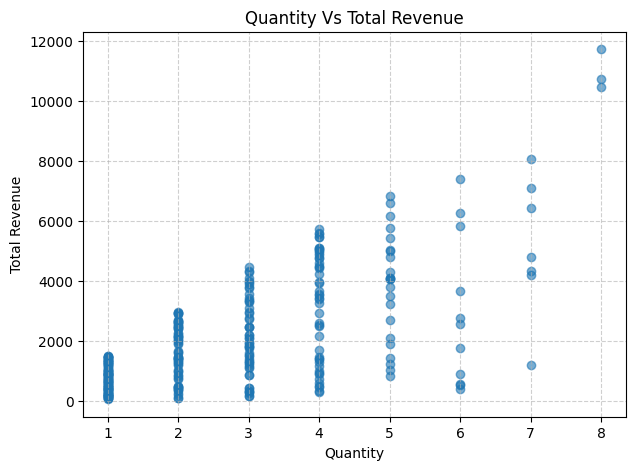

In [ ]:
from matplotlib.lines import lineStyles
#SCATTER PLOT
plt.figure(figsize=(7,5))
plt.scatter(
    df['Quantity'],
    df['Total_Amount_Clean'],
    alpha=0.6
)
plt.title("Quantity Vs Total Revenue")
plt.xlabel("Quantity")
plt.ylabel("Total Revenue")
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

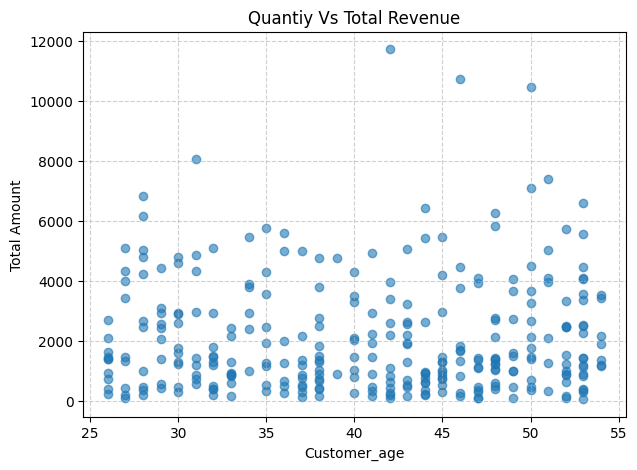

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    df['Customer_Age'],
    df['Total_Amount_Clean'],
    alpha = 0.6
)

plt.title("Quantiy Vs Total Revenue")
plt.xlabel("Customer_age")
plt.ylabel("Total Amount")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()